In [1]:
import os
from subprocess import run
res = run(["git", "rev-parse", "--show-toplevel"], capture_output=True)
root_dir = res.stdout.decode().strip()
os.chdir(root_dir)

In [4]:
import numpy as np
import cv2
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import scipy.interpolate
import astropy.units as u
import astropy.constants

import simdata

%reload_ext autoreload
%autoreload 2
from importlib import reload
from pprint import pprint

from simdata_vorticity import provide_simulation_data
from src.vortector.vortector import Vortector
from src.vortector.visualize import show_fit_overview_2D

In [40]:
# very hard example overlapping with spiral arm

# simid = "4ae2169c"
# Noutput = 30

# hard example

# simid = "306d9f0c"
# Noutput = 52

# overlapping with boundary example

# simid = "9f976424"
# Noutput = 90

# spiral arm artifact

# simid = "487fa644"
# Noutput = 222

# big vortex example
# simid = "3625e016"
# Noutput = 200

# easy example

# simid = "a122b63c"
# Noutput = 75

# # faint vortex
# simid = "65a701a4"
# Noutput = 380

# another faint vortex
# simid = "b522b88a"
# Noutput = 116

# no vortex

# simid = "3401c4d0"
# Noutput = 256

# 8cps x 2cps example

# simid = "65a701a4"
# Noutput = 50

# 16 cps example
# simid = "20ce240c"
# Noutput = 82 # overlapping with spiral, need 0.2 spacing in vortensity
# Noutput = 83
# Noutput = 84 # hard case barely passing

# easier 16 cps example
# simid = "71cfb245"
# Noutput = 54

# transition disk example
# vortex in migration jump paper
# simid = "d132cf47"
# Noutput = 524

# multiple vortices example
# simid = "b522b88a"
# Noutput  = 40


## weak vortex inspection
# simid = "5071c355"
# Noutput = 145

# weird disk structure outside
# simid = "f14ce0ba"
# Noutput = 387

# growing planet
simid = "06f2cc46"
# Noutput = 47
Noutput = 100

simid = "139400f3"
Noutput = 100


levels = [float(x) for x in np.arange(-1,1.5,0.05)]

# if "run_vortector" in locals() and "calc_quantities" in locals():
#     print("running vortector")
#     X, Y, Xc, Yc, A, vortensity, vorticity, Rho, Rho_background = calc_quantities()
#     run_vortector()

Xc, Yc, A, vortensity, vorticity, Rho, Rho_background = provide_simulation_data(simid, Noutput, skip_cache=True)

CPU times: user 1.45 s, sys: 754 ms, total: 2.21 s
Wall time: 662 ms


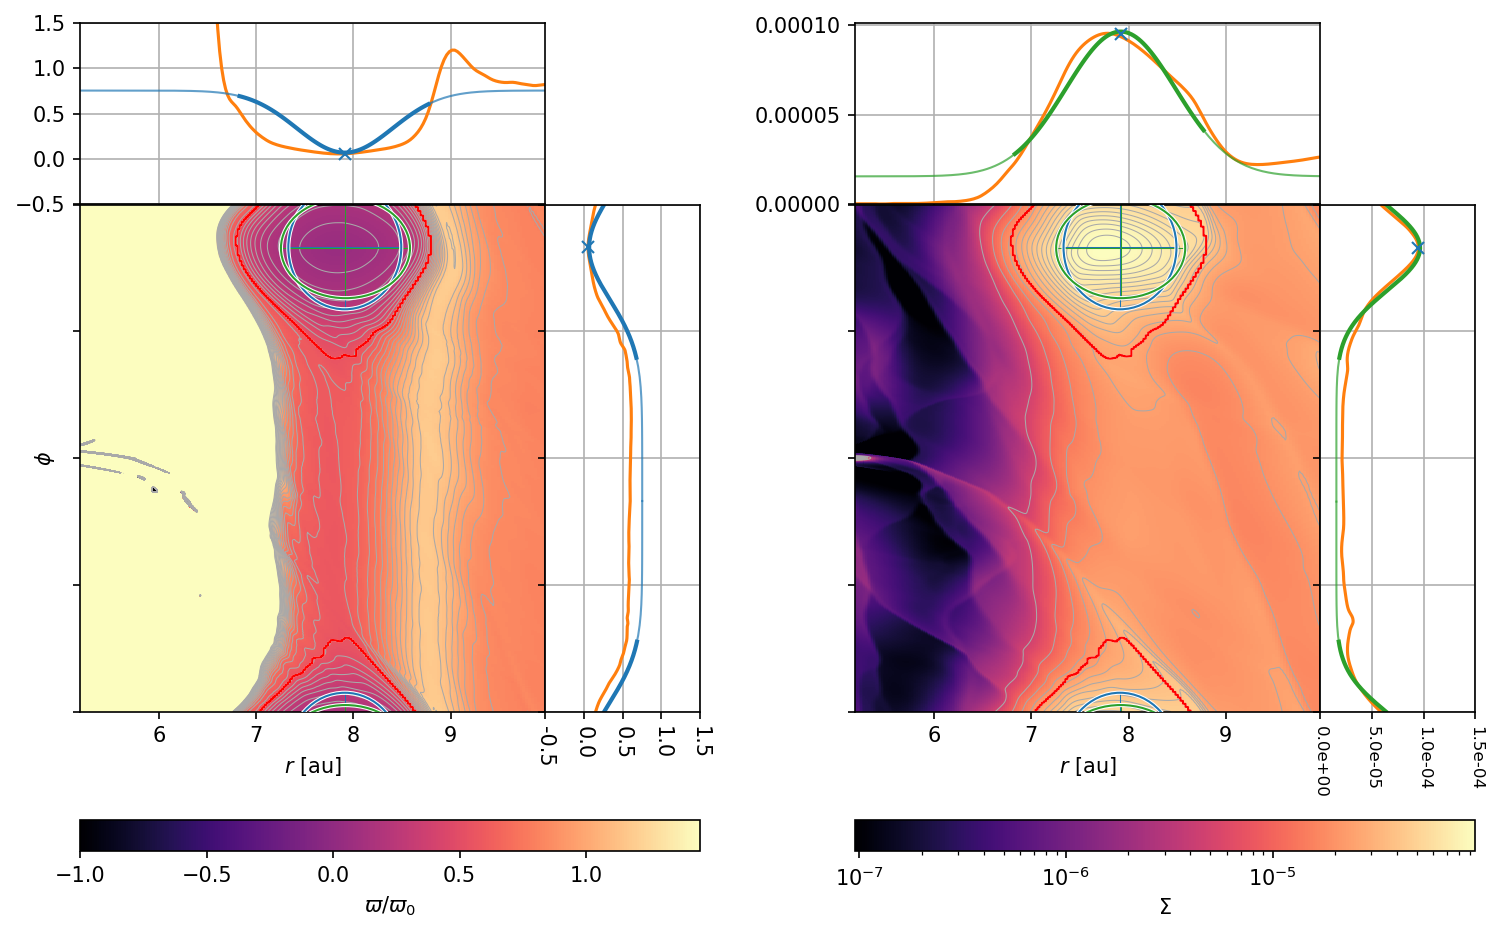

In [41]:
%matplotlib inline
Rlims = [5.2, 10]
nl = np.argmin(np.abs(Xc[:,0]-Rlims[0]))
nr = np.argmin(np.abs(Xc[:,0]-Rlims[1]))
vd = Vortector(Xc[nl:nr,:], Yc[nl:nr,:], A[nl:nr,:], vortensity[nl:nr,:], Rho[nl:nr,:],
                         verbose=False, med=0.15, mear=np.inf,
                         levels=levels
                        )
%time vortices = vd.detect(include_mask=True, keep_internals=True)
# for v in vd.vortices:
#     try:
#         v["strength"] = np.exp(-v["vortensity_median"])*v["mass"]
#         print("strength = {:.2e}, mass = {:.2e} , min vort = {:.3f}, sigma fit r_diff = {:.2e} phi_diff = {:.2e}".format(
#             v['strength'],v['mass'],v['vortensity_min'],v["sigma_fit_r_reldiff"],v["sigma_fit_phi_reldiff"]))
#         print(f"    contour diff 2D = {v['sigma_fit_contour_diff_2D']:.2e} , contour reldiff 2D = {v['sigma_fit_contour_reldiff_2D']:.2e}")
#         print(f"    ellipse diff 2D = {v['sigma_fit_ellipse_diff_2D']:.2e} , ellipse reldiff 2D = {v['sigma_fit_ellipse_reldiff_2D']:.2e}")
#         print(f"    area_ratio_ellipse_to_contour = {v['sigma_fit_area_ratio_ellipse_to_contour']:.2e}")
#     except KeyError:
#         pass
    
show_fit_overview_2D(vd)

Text(0.5, 0.98, 'Vorticity 139400f3 Noutput = 100')

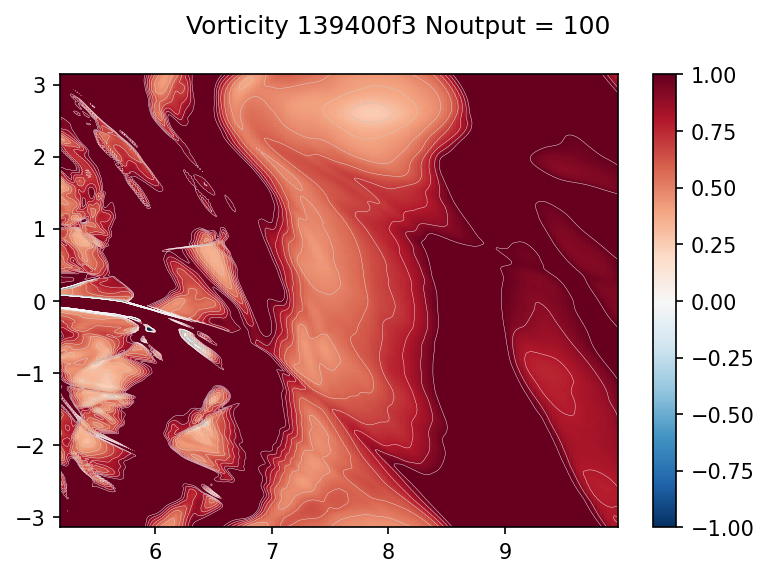

In [42]:
mask = vd.vortices[0]["contour"]["mask"]
fig, ax = plt.subplots(dpi=150)
vorticity_masked = np.ma.masked_array(vorticity[nl:nr,:], mask=~mask)
im = ax.pcolormesh(Xc[nl:nr,:], Yc[nl:nr,:], vorticity[nl:nr,:], vmin=-1, vmax=1, cmap="RdBu_r")
cbar = fig.colorbar(im)
ax.contour(Xc[nl:nr,:], Yc[nl:nr,:], vorticity[nl:nr,:], cmap="Greys_r", levels=np.linspace(-1,1,21), linewidths=0.2)
fig.suptitle(f"Vorticity {simid} Noutput = {Noutput}")

Text(0.5, 0.98, 'Vorticity 06f2cc46 Noutput = 100')

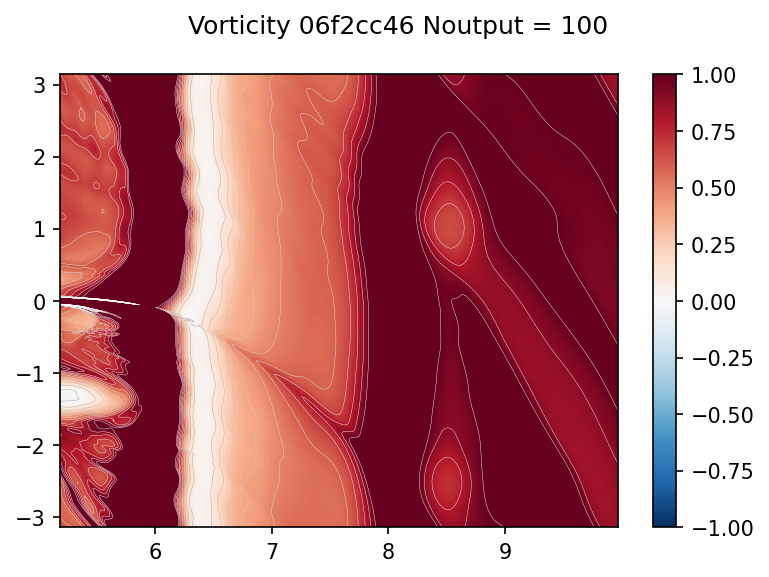

In [39]:
mask = vd.vortices[0]["contour"]["mask"]
fig, ax = plt.subplots(dpi=150)
vorticity_masked = np.ma.masked_array(vorticity[nl:nr,:], mask=~mask)
im = ax.pcolormesh(Xc[nl:nr,:], Yc[nl:nr,:], vorticity[nl:nr,:], vmin=-1, vmax=1, cmap="RdBu_r")
cbar = fig.colorbar(im)
ax.contour(Xc[nl:nr,:], Yc[nl:nr,:], vorticity[nl:nr,:], cmap="Greys_r", levels=np.linspace(-1,1,21), linewidths=0.2)
fig.suptitle(f"Vorticity {simid} Noutput = {Noutput}")

Text(0.5, 0.98, 'Vorticity 06f2cc46 Noutput = 47')

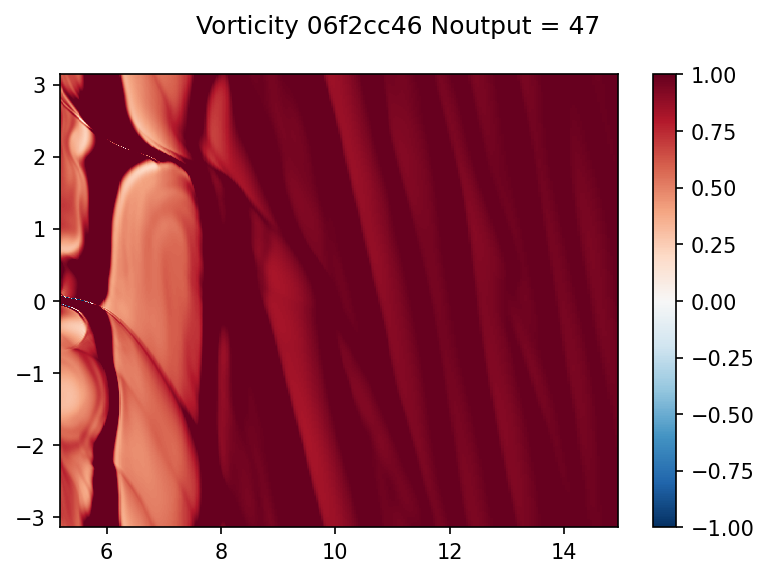

In [27]:
mask = vd.vortices[0]["contour"]["mask"]
fig, ax = plt.subplots(dpi=150)
vorticity_masked = np.ma.masked_array(vorticity[nl:nr,:], mask=~mask)
im = ax.pcolormesh(Xc[nl:nr,:], Yc[nl:nr,:], vorticity[nl:nr,:], vmin=-1, vmax=1, cmap="RdBu_r")
cbar = fig.colorbar(im)
fig.suptitle(f"Vorticity {simid} Noutput = {Noutput}")

In [7]:
%load_ext snakeviz
%snakeviz vd.detect()

ModuleNotFoundError: No module named 'widget'

In [6]:
contour = vd.vortices[0]["contour"]
boundary_pnts = contour["detection"]["boundary"]
ellipse_dict = contour["detection"]["ellipse"]
ellipse = (ellipse_dict["center_img"], ellipse_dict["axesLengths_img"], ellipse_dict["angle_img"])

In [7]:
%matplotlib widget
# detemine minimum and maximum extend of the ellipse
xmin = np.min(boundary_pnts[:, 0, 0])
xmax = np.max(boundary_pnts[:, 0, 0])
ymin = np.min(boundary_pnts[:, 0, 1])
ymax = np.max(boundary_pnts[:, 0, 1])

# make sure the ellipse also fits
ec = ellipse[0]
L = np.ceil(np.max(ellipse[1])/2)
xmin = int(min(ec[0]-L, xmin))
xmax = int(max(ec[0]+L, xmin))
ymin = int(min(ec[1]-L, ymin))
ymax = int(max(ec[1]+L, ymax))

Nx = xmax - xmin
Ny = ymax - ymin

img_shape = (Ny, Nx, 3)

# adjust a copy of the boundary points
boundary_pnts = np.copy(boundary_pnts)
boundary_pnts[:, 0, 0] -= xmin
boundary_pnts[:, 0, 1] -= ymin

# adjust a copy of the ellipse
ellipse = ((ellipse[0][0] - xmin, ellipse[0][1] - ymin),
           ellipse[1], ellipse[2])

background = 200
im_shape = background*np.ones(img_shape, dtype=np.int32)
cv2.drawContours(im_shape, [boundary_pnts], 0, (255, 255, 255), -1)

im_ellipse = background*np.ones(img_shape, dtype=np.int32)
im_ellipse = cv2.ellipse(im_ellipse, ellipse, (255, 255, 255), -1)

im_diff = np.abs(im_shape - im_ellipse)

for im in [im_shape, im_diff, im_ellipse]:
    cv2.ellipse(im, ellipse, (255,100,0), 5)
    cv2.drawContours(im, [boundary_pnts], 0, (70, 130, 180), 4)

# fig, axes = plt.subplots(2,2, dpi=150)
# axes[0,0].imshow(im_shape)
# axes[0,1].imshow(im_ellipse)
# axes[1,0].imshow(im_diff)


fig, ax = plt.subplots(dpi=150)
ax.imshow(im_shape)
bx = boundary_pnts[:, 0, 0]
by = boundary_pnts[:, 0, 1]
ax.plot(bx, by, "x", markersize=1)

def ellipse_pnt(x, y, ellipse):
    angle = ellipse[2]/180*np.pi
    cx = ellipse[0][0]
    cy = ellipse[0][1]
    e1 = ellipse[1][0]/2
    e2 = ellipse[1][1]/2
    
    l = np.sqrt((x-cx)**2 + (y-cy)**2)
    nx = (x-cx) / l
    ny = (y-cy) / l
    
    na = np.arctan2(ny, nx)
    alpha = na - angle
    
    tansq = np.tan(alpha)**2
    length = e1 * np.sqrt((1+tansq)/(1+tansq*e1**2/e2**2))
    
    px = cx + length * nx
    py = cy + length * ny
    
    return px, py


px, py = ellipse_pnt(bx, by, ellipse)
ax.plot(px, py, "rx", markersize=0.5)

cx = ellipse[0][0]
cy = ellipse[0][1]

def plot_lines(ax, sx, sy, tx, ty, stride=17, **kwargs):
    for _sx, _sy, _tx, _ty, n in zip(sx, sy, tx, ty, range(len(sx))):
        if n % stride == 0:
            ax.plot([_sx, _tx], [_sy, _ty], **kwargs)


plot_lines(ax, bx, by, px, py, alpha=0.5, lw=0.4, color="C2")
# cxs = cx*np.ones(len(px))
# cys = cy*np.ones(len(py))
# plot_lines(ax, cxs, cys, px, py, stride=1, alpha=0.5, lw=1, color="C2")
# plot_lines(ax, cxs, cys, bx, by, stride=1, alpha=0.5, lw=1, ls=":", color="C3")


ax.plot(cx, cy, "gx")

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [8]:
def ellipse_pnt(x, y, ellipse):
    angle = ellipse[2]/180*np.pi
    cx = ellipse[0][0]
    cy = ellipse[0][1]
    e1 = ellipse[1][0]/2
    e2 = ellipse[1][1]/2
    
    l = np.sqrt((x-cx)**2 + (y-cy)**2)
    nx = (x-cx) / l
    ny = (y-cy) / l
    
    na = np.arctan2(ny, nx)
    alpha = na - angle
    
    tansq = np.tan(alpha)**2
    length = e1 * np.sqrt((1+tansq)/(1+tansq*e1**2/e2**2))
    
    px = cx + length * nx
    py = cy + length * ny
    
    return px, py


def tetragon_area(p1,p2,p3,p4):
    return triangle_area(p1,p2,p3) + triangle_area(p1,p3,p4)
    
def triangle_area(p1,p2,p3):
    signed_area = (
        +p3[0] * (p1[1] - p2[1])
        + p1[0] * (p2[1] - p3[1])
        + p2[0] * (p3[1] - p1[1])
    ) / 2
    return np.abs(signed_area)

def calc_diff_area(bx, by, ellipse):
    px, py = ellipse_pnt(bx, by, ellipse)
    area = 0
    for n in range(len(px)-1):
        p1 = [px[n], py[n]]
        p4 = [px[n+1], py[n+1]]
        p2 = [bx[n], by[n]]
        p3 = [bx[n+1], by[n+1]]
        area += tetragon_area(p1,p2,p3,p4)
    return area

bx = contour["detection"]["boundary"][:,0,0]
by = contour["detection"]["boundary"][:,0,1]
ellipse_dict = contour["detection"]["ellipse"]
ellipse = (ellipse_dict["center_img"], ellipse_dict["axesLengths_img"], ellipse_dict["angle_img"])


if len(bx) > 100:
    Nstride = int(np.ceil(len(bx)/100))
else:
    Nstride = 1
print(f"Nstride = {Nstride}")
%time calc_diff_area(bx[::Nstride], by[::Nstride], ellipse)



Nstride = 17
CPU times: user 4.41 ms, sys: 80 µs, total: 4.49 ms
Wall time: 4.66 ms


31492.558934917677

In [9]:
from src.vortector.contour import ellipse_deviation_draw
boundary_pnts = contour["detection"]["boundary"]
%time ellipse_deviation_draw(boundary_pnts, ellipse, 1)

CPU times: user 3.41 ms, sys: 3.88 ms, total: 7.29 ms
Wall time: 6.67 ms


(28217.0, 28217.0)

In [10]:
contour["detection"]["ellipse_area_delta"]

31492.558934917677

In [11]:
import cProfile
import pstats
from pstats import SortKey
p = cProfile.run("vd.detect()", "restats");
p = pstats.Stats('restats')
p.strip_dirs().sort_stats(SortKey.TIME).print_stats(10)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Fri Apr 30 19:20:03 2021    restats

         227173 function calls (221501 primitive calls) in 1.338 seconds

   Ordered by: internal time
   List reduced from 1332 to 10 due to restriction <10>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
       12    0.432    0.036    0.432    0.036 {method 'encode' of 'ImagingEncoder' objects}
       50    0.155    0.003    0.155    0.003 {method 'create_contour' of 'matplotlib.QuadContourGenerator' objects}
      759    0.098    0.000    0.098    0.000 gaussfit.py:28(gauss2D)
       50    0.075    0.001    0.080    0.002 {method 'draw_path_collection' of 'matplotlib.backends._backend_agg.RendererAgg' objects}
      105    0.070    0.001    0.075    0.001 decomp_svd.py:16(svd)
     8422    0.060    0.000    0.060    0.000 contour.py:341(triangle_area)
        1    0.034    0.034    0.034    0.034 {method 'take' of 'numpy.ndarray' objects}
      640    0.026    0.000    0.026    0.000 {built-in method numpy.zeros}
6916/51

In [12]:
import cProfile
import pstats
from pstats import SortKey
p = cProfile.run("vd.detect()", "restats");
p = pstats.Stats('restats')
p.strip_dirs().sort_stats(SortKey.TIME).print_stats(10)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Fri Apr 30 19:20:04 2021    restats

         227389 function calls (221717 primitive calls) in 1.425 seconds

   Ordered by: internal time
   List reduced from 1332 to 10 due to restriction <10>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
       12    0.430    0.036    0.430    0.036 {method 'encode' of 'ImagingEncoder' objects}
       50    0.152    0.003    0.152    0.003 {method 'create_contour' of 'matplotlib.QuadContourGenerator' objects}
      759    0.103    0.000    0.103    0.000 gaussfit.py:28(gauss2D)
       50    0.077    0.002    0.082    0.002 {method 'draw_path_collection' of 'matplotlib.backends._backend_agg.RendererAgg' objects}
        1    0.064    0.064    0.064    0.064 contour.py:191(<dictcomp>)
     8422    0.062    0.000    0.062    0.000 contour.py:341(triangle_area)
      105    0.055    0.001    0.061    0.001 decomp_svd.py:16(svd)
      640    0.045    0.000    0.045    0.000 {built-in method numpy.zeros}
6916/5149    0.044    0

In [13]:
show_fit_overview_1D(vd, 1)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [14]:
vortices[0]

{'contour': {'detection': {'boundary': array([[[732, 928]],
   
          [[733, 927]],
   
          [[734, 927]],
   
          ...,
   
          [[729, 929]],
   
          [[730, 928]],
   
          [[731, 928]]], dtype=int32),
   'opencv_contour_number': 2605,
   'pixel_area': 218080.5,
   'pixel_arcLength': 2015.530210852623,
   'bounding_hor_img': array([921, 480], dtype=int32),
   'bounding_vert_img': array([ 927, 1712], dtype=int32),
   'bottom_img': (745, 1712),
   'top_img': (733, 927),
   'left_img': (480, 1281),
   'right_img': (921, 1280),
   'dx_img': 441,
   'dy_img': 785,
   'ellipse': {'center_img': (707.2640380859375, 1302.576904296875),
    'axesLengths_img': (409.3416442871094, 712.1373901367188),
    'angle_img': 179.78759765625},
   'mask_img': array([[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]

## Test vortector class implementation

Plot vortensity

In [15]:
xlims = [5.2, 12]

Detect vortex

In [60]:
rmin = 5.2
rmax = 10

mask_loc_inner = Xc < rmin
mask_loc_outer = Xc > rmax
mask_loc = np.logical_or(mask_loc_inner, mask_loc_outer)


n_overshoot_vort = 2
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]


n_overshoot_Sigma = 2
f_Sigmas = [2.0, 1.9, 1.8, 1.7, 1.6, 1.5]

for vorticity_th in thresholds:
    mask_vorticity = vorticity > vorticity_th
    for f_Sigma in f_Sigmas:
        mask_dens = Rho < f_Sigma * Rho_background
        mask = np.logical_or(mask_loc, mask_dens)
        mask = np.logical_or(mask, mask_vorticity)
        if np.sum(mask == 0) < 1000:
            continue
        else:
            if n_overshoot_Sigma <= 0:
                break
            else:
                n_overshoot_Sigma -= 1
                continue
    if np.sum(mask == 0) > 0:
        if n_overshoot_vort <= 0:
            print("f_Sigma",f_Sigma)
            print("threshold", vorticity_th)
            break
        else:
            n_overshoot_vort -= 1

vals = np.ma.masked_array(vortensity, mask=mask)

Zmin = np.min(vals)

ind = np.argmin(vals, axis=None)
inds = np.unravel_index(ind, vals.shape)
x = X[inds]
y = Y[inds]

cmap="magma"
norm = colors.Normalize(vmin=levels[0], vmax=levels[-1])

fig, ax = plt.subplots(dpi=150)
img = ax.pcolormesh(X,Y,vortensity,cmap=cmap,norm=norm)
# ax.contour(Xc, Yc, mask, cmap="Greys")
contour_colors = "darkgray"
contour_lw = 1
# ax.contour(Xc, Yc, mask, colors="white")
# ax.contour(Xc, Yc, vortensity, levels=levels, colors=contour_colors, linewidths=contour_lw)

print("argmin", "ind", ind, "inds", inds, "x", x, "y", y, "Zmin", Zmin)
# ax.plot(x, y, "x")
ax.set_xlim(xlims)

ax.set_xlabel(r"$r$ [au]")
ax.set_ylabel(r"$\phi$")

ix = inds[0]
iy = inds[1]
rho_avg = np.average(Rho[ix, :])
rho_max = np.max(Rho[ix, :])
rho0 = np.average(Rho_background[ix, :])

cbar = fig.colorbar(img, ax=ax)
cbar.set_label(r"$\varpi/\varpi_0$")

print("normalized Z", Zmin * rho_avg / rho0)
print("ratio rho_avg / rho0", rho_avg / rho0)
print("ratio rho_max / rho0", rho_max / rho0)

f_Sigma 2.0
threshold 0.3


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

argmin ind 344952 inds (336, 888) x 8.040993987954765 y 2.3009711818284617 Zmin 0.0444439556567655
normalized Z 0.07799525531822525
ratio rho_avg / rho0 1.7549125447017313
ratio rho_max / rho0 5.308328992437491


Detect closed regions in the contour plot

In [17]:
Rc = Xc
view_min = np.argmin(Rc[:,0] < xlims[0])
view_max = np.argmin(Rc[:,0] < xlims[1])
print(view_min, view_max)

265 402


In [59]:
fig, ax = plt.subplots(dpi=150)
vmi = view_min
vma = view_max

img = ax.contour(Xc[vmi:vma,:], Yc[vmi:vma,:], vortensity[vmi:vma,:], levels=levels,
                colors=contour_colors, linewidths=contour_lw)
# ax.set_xscale("log")
ax.set_xlabel(r"$r$ [au]")
ax.set_ylabel(r"$\phi$")


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Text(0, 0.5, '$\\phi$')

Make an image out of the contour lines

In [19]:
def fig2rgb_array(fig):
    fig.canvas.draw()
    buf = fig.canvas.tostring_rgb()
    ncols, nrows = fig.canvas.get_width_height()
    return np.fromstring(buf, dtype=np.uint8).reshape(nrows, ncols, 3)

In [20]:
vmi = view_min
vma = view_max
data_view = vortensity[vmi:vma,:]

Nx, Ny = data_view.shape
int_aspect = int(np.max([Nx/Ny, Ny/Nx]))

if int_aspect >= 2:
    if Nx < Ny:
        CNx = int_aspect*Nx
        CNy = Ny
    else:
        CNx = Nx
        CNy = int_aspect*Ny

if min(CNx, CNy) < 1000:
    supersample = int(np.ceil(1000/min(CNx, CNy)))
else:
    supersample = 1

CNx *= supersample
CNy *= supersample
        
print(f"Nx {Nx}, Ny {Ny}, int_aspect {int_aspect}, supersample {supersample}, CNx {CNx}, CNy {CNy}")
        
fig = plt.figure(frameon=False, figsize=(CNx,2*CNy), dpi=1)
#fig.set_size_inches(w,h)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)

def periodically_extend(arr):
    Hhalf = int(arr.shape[1]/2)
    rv = np.concatenate(
        [arr[:,Hhalf:],
         arr,
         arr[:,:Hhalf]],
        axis=1
    )
    return rv
Zpe = periodically_extend(vortensity[vmi:vma,:])
Xpe = periodically_extend(Xc[vmi:vma,:])
Ype = periodically_extend(Yc[vmi:vma,:])

img = ax.contour(Zpe.transpose()
                 ,levels=levels, linewidths=CNx/1000, antialiased=False)

# ax.set_xlim(xlims)

# img = ax.contour(Xc[vmi:vma,:], Yc[vmi:vma,:], vortensity[vmi:vma,:]
#                  , levels=levels, linewidths=CNx/1000)

# ax.set_xscale("log")

# fig.canvas.draw()
# img_data = np.fromstring(fig.canvas.tostring_rgb(), dtype=np.uint8, sep='')
# img_data = img_data.reshape(fig.canvas.get_width_height()[::-1] + (3,))
# img_data = cv2.cvtColor(img_data, cv2.COLOR_BGR2GRAY)
img_data = fig2rgb_array(fig)
img_data = cv2.cvtColor(img_data, cv2.COLOR_BGR2GRAY)
plt.close(fig)

Nx 137, Ny 1024, int_aspect 7, supersample 2, CNx 1918, CNy 2048


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [21]:
img_data.shape

(4096, 1918)

## Threshold contour image for full contrast

In [22]:
ret,thresh = cv2.threshold(img_data,250,255,0)
fig, ax = plt.subplots(dpi=150)
ax.imshow(thresh, cmap="Greys_r")

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

## Extract contours and construct hierarchy

In [23]:
# contours, hierarchy = cv2.findContours(
#         img_data, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
# contours, hierarchy = cv2.findContours(
#         thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
contours, hierarchy = cv2.findContours(
        thresh, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)
print("number of contours", len(contours))

contours_dict = { n : { "cnt" : cnt, "n" : n } for n, cnt in enumerate(contours) }

areas = [cv2.contourArea(c) for c in contours]
for n, d in enumerate(contours_dict.values()):
    d["area"] = areas[n]

sort_inds = np.argsort(areas)
ind_max = sort_inds[-1]
cnt_max = contours[ind_max]
contours_sorted = [contours_dict[i] for i in sort_inds]

# take the up to 100 largest patches
contours_largest = [contours_dict[i] for i in [n for n in sort_inds[::-1]][:100]]

number of contours 1954


## Extract closed contours

In [24]:
aspect_ratio_max = np.inf

contours_convex = []
for n, contour in enumerate(contours_largest):
    cnt = contour["cnt"]
    l = cv2.arcLength(cnt,True)
    contour["arcLength"] = l
    a = contour["area"]
    leftmost = tuple(cnt[cnt[:,:,0].argmin()][0])
    rightmost = tuple(cnt[cnt[:,:,0].argmax()][0])
    topmost = tuple(cnt[cnt[:,:,1].argmin()][0])
    bottommost = tuple(cnt[cnt[:,:,1].argmax()][0])
    dx = rightmost[0] - leftmost[0]
    dy = bottommost[1] - topmost[1]
    
    Nh = int(thresh.shape[0]/2)
    Nq = int(thresh.shape[0]/4)
    
    # sort out mirrors of contours fully contained in original area
    if bottommost[1] < Nq or topmost[1] > 3*Nq:
        continue

    is_not_too_elongated = dx >0 and dy >0 and max(dx/dy, dy/dx) < aspect_ratio_max
    is_area_larget_delimiter = l  > 0 and a > l
    is_not_spanning_whole_height = dy < 0.5*0.95*thresh.shape[0]

    if not(is_not_too_elongated and is_area_larget_delimiter and is_not_spanning_whole_height):
        continue
    
#     contours_convex.append(contour)
#     continue
    
    # sort out the lower of mirror images
    bounding_hor = np.array([ rightmost[0], leftmost[0]] )
    bounding_vert = np.array([ topmost[1], bottommost[1] ])
    contour["bottom_extended"] = bottommost
    contour["top_extended"] = topmost
    contour["left_extended"] = leftmost
    contour["right_extended"] = rightmost
    contour["bounding_hor"] = bounding_hor
    contour["bounding_vert"] = bounding_vert
    
    to_del = None
    found_mirror = False
    for k,c in enumerate(contours_convex):
        same_hor = (bounding_hor == c["bounding_hor"]).all()
        same_vert = (np.abs(bounding_vert % Nh - c["bounding_vert"] % Nh) < 20).all()
        if same_hor and same_vert:
            if bounding_vert[1] > c["bounding_vert"][1]:
                to_del = k
            found_mirror = True
            break
#     if found_mirror:
#         continue
#     else:
#         contours_convex.append(contour)
    if found_mirror:
        if to_del is not None:
            del contours_convex[to_del]
            contours_convex.append(contour)
    else:
        contours_convex.append(contour)
    
    
print("number of convex contours", len(contours_convex))

print([c["area"] for c in contours_convex])

number of convex contours 37
[481486.0, 472335.5, 379678.0, 371831.5, 355137.0, 305200.0, 300524.5, 275362.0, 271057.5, 248503.5, 244508.5, 223615.5, 219862.5, 199747.0, 196218.0, 175873.5, 172559.0, 149993.5, 146928.5, 121974.5, 119209.5, 91893.0, 89500.0, 86780.0, 79791.0, 77354.5, 61862.5, 58038.0, 56134.0, 39189.0, 14738.0, 13389.0, 10657.5, 10162.0, 9849.5, 8830.0, 7274.0]


In [25]:
dst = np.array(thresh)*0
cv2.drawContours(dst, contours, -1, (255, 255, 0), -1)
# cv2.drawContours(dst, contours_convex, -1, (255, 255, 0), -1)
fig, ax = plt.subplots(dpi=150)
ax.imshow(dst)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [26]:
max_ellipse_deviation = 0.15

candidates = {}
for contour in contours_convex:
    cnt = contour["cnt"]
    ellipse = cv2.fitEllipse(cnt)
    
    im_shape = np.zeros(thresh.shape)
    cv2.drawContours(im_shape, [cnt], 0, (255, 255, 255), -1)

    im_ellipse = np.zeros(thresh.shape)
    im_ellipse = cv2.ellipse(im_ellipse,ellipse,(255,255,255),-1)
    
    difference = np.abs(im_shape - im_ellipse)
    difference_area = np.sum(difference/255)
    
    rel_delta = difference_area / contour["area"]
    
    
    if rel_delta > max_ellipse_deviation:
        continue
    
    contour["mask_extended"] = im_shape
    candidates[contour["n"]] = contour
    continue
    
    fig, ax = plt.subplots(figsize=(6,4), dpi=150)
    im = np.ones(list(thresh.shape) + [3])*255
    cv2.drawContours(im, [cnt], 0, (0, 0, 0), -1)
    
    im = cv2.ellipse(im,ellipse,(1,140/255,0),40)
    im = cv2.ellipse(im,ellipse,(0,0,0),15)
    
    im_contour = np.array(im[:,:,0], dtype=int)
    print("max value", np.max(im))
    
    ax.imshow(im)
    
    n = contour["n"]
    ax.set_title(f"opencv contour nr. {n}\ndelta area = {difference_area}\nrel delta area {rel_delta:.3f}")

print([c["area"] for c in candidates.values()])

[305200.0, 300524.5, 275362.0, 271057.5, 248503.5, 244508.5, 223615.5, 219862.5, 199747.0, 196218.0, 175873.5, 172559.0, 149993.5, 146928.5, 121974.5, 119209.5, 91893.0, 89500.0, 58038.0, 56134.0, 10657.5, 10162.0, 9849.5, 8830.0]


In [27]:
ellipse

((832.6943969726562, 581.9312744140625),
 (197.70436096191406, 1052.2755126953125),
 178.1090850830078)

In [28]:
candidate_list = [c for c in candidates.values()]
c = candidate_list[0]
mask_extended = c["mask_extended"]
# reduce back to normal image size
Nh = int(mask_extended.shape[0]/2)
Nq = int(mask_extended.shape[0]/4)
mask_lower = mask_extended[3*Nq:, :]
mask_upper = mask_extended[:Nq, :]
mask_repeated = np.concatenate([mask_lower, mask_upper])
mask_orig = mask_extended[Nq:3*Nq, :]
mask_reduced = np.logical_or(mask_orig, mask_repeated)

cnt = c["cnt"]
leftmost = tuple(cnt[cnt[:,:,0].argmin()][0])
rightmost = tuple(cnt[cnt[:,:,0].argmax()][0])
topmost = tuple(cnt[cnt[:,:,1].argmin()][0])
bottommost = tuple(cnt[cnt[:,:,1].argmax()][0])

print(topmost, bottommost)

fig, axes = plt.subplots(2,3, figsize=(10,7))
axes = axes.ravel()

axes[0].imshow(mask_extended)
x = bottommost[0]
y = bottommost[1]
axes[0].plot([x],[y], "x", color="white")


axes[1].imshow(mask_upper)
axes[2].imshow(mask_lower)
axes[3].imshow(mask_orig)
axes[4].imshow(mask_repeated)

def map_ext_pnt_to_orig(pnt):
    x = pnt[0]
    y = pnt[1]
    if y > Nq and y <= 3*Nq:
        y -= Nq
    elif y < Nq:
        y += Nq
    elif y > 3*Nq:
        y -= 3*Nq
    return (x,y)
    
axes[5].imshow(mask_reduced)
x, y = map_ext_pnt_to_orig(bottommost)
axes[5].plot([x],[y], "x", color="white")
x, y = map_ext_pnt_to_orig(topmost)
axes[5].plot([x],[y], "x", color="white")
x, y = map_ext_pnt_to_orig(leftmost)
axes[5].plot([x],[y], "x", color="white")
x, y = map_ext_pnt_to_orig(rightmost)
axes[5].plot([x],[y], "x", color="white")


# set titles
axes[0].set_title(f"mask {mask.shape}")
axes[1].set_title(f"mask_upper {mask_upper.shape}")
axes[2].set_title(f"mask_lower {mask_lower.shape}")
axes[3].set_title(f"mask_orig {mask_orig.shape}")
axes[4].set_title(f"mask_repeated {mask_repeated.shape}")
axes[5].set_title(f"mask_reduced {mask_reduced.shape}")

(1015, 2976) (1031, 3761)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Text(0.5, 1.0, 'mask_reduced (2048, 1918)')

## Transform the image from ellipse fitting images back to match the grid

In [29]:
Nh = int(mask_extended.shape[0]/2)
Nq = int(mask_extended.shape[0]/4)
def map_ext_pnt_to_orig(pnt):
    x = pnt[0]
    y = pnt[1]
    if y > Nq and y <= 3*Nq:
        y -= Nq
    elif y < Nq:
        y += Nq
    elif y > 3*Nq:
        y -= 3*Nq
    return (x,y)

for contour in candidates.values():
    mask_extended = contour["mask_extended"]
    # reduce back to normal image size
    Nh = int(mask_extended.shape[0]/2)
    Nq = int(mask_extended.shape[0]/4)
    mask_lower = mask_extended[3*Nq:, :]
    mask_upper = mask_extended[:Nq, :]
    mask_repeated = np.concatenate([mask_lower, mask_upper])
    mask_orig = mask_extended[Nq:3*Nq, :]
    mask_reduced = np.logical_or(mask_orig, mask_repeated)
    
    # fit back to original data shape
    mask = mask_reduced.transpose()[:,::-1]
    mask = mask[::supersample,::supersample]
    if int_aspect >= 2:
        if Nx < Ny:
            mask = mask[::int_aspect,:]
        else:
            mask = mask[:,::int_aspect]
    mask = np.array(mask, dtype=bool)
    contour["mask"] = mask
    
    for key in ["bottom", "top", "left", "right"]: 
        pnt = contour[key + "_extended"]
        x, y = map_ext_pnt_to_orig(pnt)
        y = Nh - y
        x /= supersample
        y /= supersample
        if Nx < Ny:
            x /= int_aspect
        else:
            y /= int_aspect
        x = int(x)
        y = int(y)
        contour[key + "_view"] = (x,y)
        contour[key] = (x + vmi, y)
        

## Calculate mass of cells

In [30]:
mass = A*Rho

mass_background = A*Rho_background

mass_view = mass[vmi:vma,:]
mass_background_view = mass_background[vmi:vma,:]
vortensity_view = vortensity[vmi:vma,:]
vorticity_view = vorticity[vmi:vma,:]

Xc_view = Xc[vmi:vma,:]
Yc_view = Yc[vmi:vma,:]
Rho_view = Rho[vmi:vma,:]

## Show the candidates

In [31]:
fig, ax = plt.subplots(figsize=(8,6),dpi=150)
ax.set_xscale("log")

Z = vortensity
cmap = "magma"
norm = colors.Normalize(vmin=levels[0], vmax=levels[-1])
img = ax.pcolormesh(Xc_view, Yc_view/np.pi, vortensity_view,cmap=cmap,norm=norm, rasterized=True)

ax.contour(Xc_view, Yc_view/np.pi, vortensity_view, levels=levels, colors=contour_colors, linewidths=contour_lw )

for n, contour in enumerate(candidates.values()):
    cmap = "Blues" if n==1 else "Greys"
    ax.contour(Xc_view, Yc_view/np.pi, contour["mask"], colors="C2", linewidths=0.5)
#     ix, iy = contour["bottom_view"]
#     x = Xc_view[ix, iy]
#     y = Yc_view[ix, iy]
#     ax.plot([x], [y/np.pi], "x")
    
ax.set_xlabel(r"$r$ [au]")
ax.set_ylabel(r"$\phi / \pi$")
ax.set_yticks([-1, -0.5, 0, 0.5, 1])

cbar = fig.colorbar(img, ax=ax)
cbar.set_label(r"$\varpi/\varpi_0$")

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

## Generate ancestor list 

The hierarchy generated by opencv in the contour finder outputs a list with the syntax
```
[Next, Previous, First_Child, Parent]
```
If any of those is not available its encoded  by -1.

In [32]:
for c in candidates.values():
    ancestors = []
    n_parent = c["n"]
    for n in range(1000):
        n_parent = hierarchy[0,n_parent,3]
        if n_parent == -1 or n_parent not in candidates:
            break
        ancestors.append(n_parent)
    c["ancestors"] = ancestors
    print(c["n"], ancestors)

890 []
887 []
888 [887]
885 []
886 [885]
878 []
879 [878]
873 []
1807 []
1776 []
1777 [1776]
1732 []
1733 [1732]
1695 []
1696 [1695]
1649 []
1650 [1649]
1573 []
1574 [1573]
1537 []
1538 [1537]
1887 []
1467 []
1484 []


## Construct decendents from ancestor list
This is done to avoid causing trouble when an intermediate contour is missing.

In [33]:
decendents = {}
for c in candidates.values():
    ancestors = c["ancestors"]
    for k, n in enumerate(ancestors):
        if not n in decendents or len(decendents[n]) < k:
            decendents[n] = [i for i in reversed(ancestors[:k])]

for c in candidates.values():
    if c["n"] in decendents:
        dec = decendents[c["n"]]
    else:
        dec = []
    c["decendents"] = dec
    print(c["n"], dec)

890 []
887 []
888 []
885 []
886 []
878 []
879 []
873 []
1807 []
1776 []
1777 []
1732 []
1733 []
1695 []
1696 []
1649 []
1650 []
1573 []
1574 []
1537 []
1538 []
1887 []
1467 []
1484 []


## Remove children from candidates 

In [34]:
decendents = []
for c in candidates.values():
    decendents += c["decendents"].copy()
decendents = set(decendents)
candidates_bak = candidates.copy()
for n in decendents:
    del candidates[n]

## Get the mass and vortensity inside the candidates

In [35]:
vortensity_area_view = A[vmi:vma]*vortensity[vmi:vma]


for contour in candidates.values():
    try:
        mask = contour["mask"]
        contour["mass"] = np.sum(mass_view[mask])
        contour["mass_background"] = np.sum(mass_background_view[mask])
        contour["mass_enhancement"] = contour["mass"] - contour["mass_background"]
        contour["vortensity_mean"] = np.mean(vortensity_view[mask])
        contour["vortensity_median"] = np.median(vortensity_view[mask])
        contour["vortensity_min"] = np.min(vortensity_view[mask])
        contour["vortensity_max"] = np.max(vortensity_view[mask])
        contour["sigma_mean"] = np.mean(Rho_view[mask])
        contour["sigma_median"] = np.median(Rho_view[mask])
        contour["sigma_min"] = np.min(Rho_view[mask])
        contour["sigma_max"] = np.max(Rho_view[mask])
        
        
        contour["rmin"] = Xc_view[contour["left_view"]]
        contour["rmax"] = Xc_view[contour["right_view"]]
        contour["phimax"] = Yc_view[contour["top_view"]]
        contour["phimin"] = Yc_view[contour["bottom_view"]]
        contour["width"] = contour["rmax"] - contour["rmin"]
        if contour["phimax"] < contour["phimin"]:
            contour["height"] = contour["phimax"] + 2*np.pi - contour["phimin"]
        else:
            contour["height"] = contour["phimax"] - contour["phimin"]

        contour["vortensity_flux"] = np.sum(vortensity_area_view[mask])
            
    except (ValueError, KeyError):
        pass

## Remove candidates without vortensity min in center
A vortex should have at least a small dip in vortensity.
Exclude vortices for which the minimum vorticity is not at least 0.05 lower than the maximum vorticity.
Also check that vortensity < 1

In [36]:
min_vortensity_drop = 0.05
no_min = []
for n,c in candidates.items():
    cid = c["n"]
    if c["vortensity_min"] > 1:
        no_min.append(n)
        print(f"excluding {c['n']} because of min_vortensity > 1")
        continue
    vortensity_drop = c["vortensity_max"] - c["vortensity_min"]
    if vortensity_drop < min_vortensity_drop:
        cn = c["n"]
        print(f"excluding {cn} vortensity drop is {vortensity_drop} < {min_vortensity_drop}")
        no_min.append(n)
for n in no_min:
    del candidates[n]

excluding 1538 vortensity drop is 0.007302588622128875 < 0.05
excluding 1467 vortensity drop is 0.006612712252038952 < 0.05


## Calculate the position of minimum vortensity

In [37]:
for contour in candidates.values():
    mask = np.logical_not(contour["mask"])
    ind = np.argmin(np.ma.masked_array(vortensity_view, mask=mask), axis=None)
    inds = np.unravel_index(ind, vals.shape)
    x = Xc_view[inds]
    y = Yc_view[inds]
    contour["vortensity_min_pos"] = (x, y)
    contour["vortensity_min_inds"] = inds
    # print(f"(x,y) = ({x}, {y})")

## Calculate the position of maximum density

In [38]:
for contour in candidates.values():
    mask = np.logical_not(contour["mask"])
    ind = np.argmax(np.ma.masked_array(Rho_view, mask=mask), axis=None)
    inds = np.unravel_index(ind, vals.shape)
    x = Xc_view[inds]
    y = Yc_view[inds]
    contour["sigma_max_pos"] = (x, y)
    contour["sigma_max_inds"] = inds
    # print(f"(x,y) = ({x}, {y})")

## Sort vortices by mass

In [39]:
mass_sorted = [key for key in candidates]
mass_sorted = sorted(mass_sorted, key=lambda n: candidates[n]["mass"])
candidates = {n : candidates[n] for n in reversed(mass_sorted)}

## Remove duplicates by min vort location

In [40]:
to_del = []
for c in candidates.values():
    inds = c["vortensity_min_inds"]
    mass = c["mass"]
    
    for key, o in candidates.items():
        o_inds = o["vortensity_min_inds"]
        o_mass = o["mass"]
        if o_inds == inds and o_mass < mass:
            to_del.append(key)
for key in set(to_del):
    del candidates[key]

## Plot the vortex candidates on top of the vortensity data

In [41]:
fig, ax = plt.subplots(figsize=(8,6),dpi=150)
# ax.set_xscale("log")

Z = vortensity
cmap = "magma"
norm = colors.Normalize(vmin=levels[0], vmax=levels[-1])
img = ax.pcolormesh(Xc_view, Yc_view/np.pi, vortensity_view,cmap=cmap,norm=norm, rasterized=True)

candidates_list = [c for c in candidates.values()]
candidates_bak_list = [c for c in candidates_bak.values()]

# for contour in candidates_bak_list:
#     ax.contour(Xc[vmi:vma,:], Yc[vmi:vma,:], contour["mask"])

ax.contour(Xc_view, Yc_view/np.pi, vortensity_view, levels=levels, colors=contour_colors, linewidths=contour_lw)

for n, contour in enumerate(candidates_list):
    cmap = "Blues" if n==1 else "Greys"
    ax.contour(Xc_view, Yc_view/np.pi, contour["mask"], colors="C2", linewidths=1)
    x,y = contour["vortensity_min_pos"]
    ax.plot([x], [y/np.pi], "x")
    rmin = contour["rmin"]
    rmax = contour["rmax"]
    phimin = contour["phimin"]/np.pi
    phimax = contour["phimax"]/np.pi
#     ax.plot([rmin, rmin], [phimin, phimax], color="C1")
#     ax.plot([rmax, rmax], [phimin, phimax], color="C1")
#     ax.plot([rmin, rmax], [phimin, phimin], color="C1")
#     ax.plot([rmin, rmax], [phimax, phimax], color="C1")

    

ax.set_xlabel(r"$r$ [au]")
ax.set_ylabel(r"$\phi / \pi$")
ax.set_yticks([-1, -0.5, 0, 0.5, 1])

cbar = fig.colorbar(img, ax=ax)
cbar.set_label(r"$\varpi/\varpi_0$")

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

## Print out some properties

In [42]:
from pprint import pprint
for vort in candidates.values():
    try:
        v = vort.copy()
        for k in ["cnt", "mask", "mask_extended","gmask"]:
            del v[k]
        pprint(v)
        mass = vort["mass"]
        vort_med = vort["vortensity_median"]
        print([x % Nh for x in vort["bounding_vert"]])
        print("strength", np.exp(-vort_med)*mass)
    except KeyError:
        pass
    print()

## Calculate the center of gravity of the vortex

In [43]:
from scipy.optimize import curve_fit

def gauss(x, y0, a, x0, sigma):
    return a * np.exp(-(x - x0)**2 / (2 * sigma**2)) + y0

class Fitter:
    def __init__(self, x, y, weights=None, autoweight=True, blow=dict(), bup=dict(), fixed=dict()):
        self.x = x
        self.y = y
        self.autoweight = autoweight
        self.weights = weights
        
        self.parameters = ["y0", "a", "x0", "sigma"]
        
        self.blow = {key : -np.inf for key in self.parameters}
        self.bup = {key : np.inf for key in self.parameters}
        self.blow["sigma"] = 0
        self.bup["sigma"] = (np.max(x)-np.min(x))
        self.blow["x0"] = np.min(x)
        self.bup["x0"] = np.max(x)
        
        for key, val in blow.items():
            self.set_lower_bound(key, val)
        for key, val in bup.items():
            self.set_upper_bound(key, val)
        
        self.fixed = fixed
    
    def set_lower_bound(self, key, value):
        if not key in self.parameters:
            raise KeyError(f"{key} is not a member of the lower bounds dict.")
        self.blow[key] = value
        
    def set_upper_bound(self, key, value):
        if not key in self.parameters:
            raise KeyError(f"{key} is not a member of the upper bounds dict.")
        self.bup[key] = value
        
    def set_fixed(self, key, value):
        if not key in self.parameters:
            raise KeyError(f"{key} is not a valid parameter.")
        self.fixed[key] = value
    
    def fit(self):
        popt, pcov = self.fit_single()
        
        if self.weights is None and self.autoweight:
            peak_value = popt[0] + popt[1] # y0 + a
            self.calc_weights(peak_value)
            popt, pcov = self.fit_single()
        return popt, pcov
    
    def calc_weights(self, peak_value):
        difference = np.abs(self.y - peak_value)
        self.weights = np.exp(-difference/np.max(difference))
    
    def fit_single(self):
        x = self.x
        y = self.y
        fixed = self.fixed
        weights = self.weights
        lower = [self.blow[key] for key in self.parameters]
        upper = [self.bup[key] for key in self.parameters]
        
        mean = sum(x * y) / sum(y)
        sigma = np.sqrt(sum(y * (x - mean)**2) / sum(y))
        
        if "y0" in fixed and "a" in fixed:
            f = lambda x,x0,sig: gauss(x, fixed["y0"], fixed["a"], x0, sig)
            p0 = [mean, sigma]
            bounds = (lower[2:], upper[2:])
            popt,pcov = curve_fit(f, x, y, p0=p0, bounds=bounds, sigma=weights)
            popt = [fixed["y0"], fixed["a"], popt[0], popt[1]]
        elif "y0" in fixed:
            f = lambda x,a,x0,sig: gauss(x, fixed["y0"], a, x0, sig)
            p0 = [np.average(y),mean, sigma]
            bounds = (lower[1:], upper[1:])
            popt,pcov = curve_fit(f, x, y, p0=p0,bounds=bounds, sigma=weights)
            popt = [fixed["y0"], popt[0], popt[1], popt[2]]
        else:
            f = gauss
            p0 = [np.average(y), y[int(len(y)/2)], mean, sigma]
            bounds = (lower, upper)
            popt,pcov = curve_fit(f, x, y, p0=p0, bounds=bounds, sigma=weights)
    
        return popt, pcov

In [44]:
def combine_periodic(x,y,m,lb=-np.pi,rb=np.pi):
    """ Combine an array split at a periodic boundary. """
    if m[0] and m[-1] and not all(m):
        bnd = np.where(m==False)[0][0]
        xl = x[:bnd]
        yl = y[:bnd]
        bnd = np.where(m==False)[0][-1]
        xr = x[bnd:]
        yr = y[bnd:]
        xcom = np.append(xr, xl+(rb-lb))
        ycom = np.append(yr, yl)
        return xcom, ycom
    else:
        return x[m],y[m]

In [45]:
def plot_periodic_mask(ax, x, y, m, **kwargs):
#     print(m)
    if m[0] and m[-1] and not all(m):
        bnd = np.where(m==False)[0][0]
        xl = x[:bnd]
        yl = y[:bnd]
        line, = ax.plot(xl, yl, **kwargs)
        bnd = np.where(m==False)[0][-1]
#         print(len(x))
#         print(bnd)
        xr = x[bnd:]
        yr = y[bnd:]
        kwa = kwargs.copy()
        kwa["color"] = line.get_color()
        kwa["ls"] = line.get_linestyle()
        line, = ax.plot(xr, yr, **kwa)
        line.set_label(None)
    else:
        ax.plot(x[m],y[m],**kwargs)

def plot_periodic(ax, x, y, m=None, boundaries=(-np.pi, np.pi), **kwargs):
    if m is not None:
        plot_periodic_mask(ax, x, y, m, **kwargs)
        return
    x[x<boundaries[0]] += boundaries[1]-boundaries[0]
    m = x > boundaries[1]
    if not any(m):
        ax.plot(x,y,**kwargs)
    else:
        bnd = np.where(m==True)[0][0]
        xl = x[:bnd]
        yl = y[:bnd]
        line, = ax.plot(xl, yl, **kwargs)
        xr = x[bnd:] - (boundaries[1]-boundaries[0])
        yr = y[bnd:]
        kwa = kwargs.copy()
        kwa["color"] = line.get_color()
        kwa["ls"] = line.get_linestyle()
        line, = ax.plot(xr, yr, **kwa)
        line.set_label(None)
    


In [46]:
def plot_gauss(ax,x,y, xfull=None, double_fit=True, fixed=dict(), blow=dict(), bup=dict()):
    try:
        fitter = Fitter(x, y, blow=blow, bup=bup, fixed=fixed)
        popt, pcov = fitter.fit_single()
        ax.plot(x, gauss(x, *popt), 'r-', color="C2", label='1st fit')
        
        if double_fit:
            peak_value = popt[0] + popt[1] # y0 + a
            difference = np.abs(y - peak_value)
            w = np.exp(-difference/np.max(difference))
            fitter.weights = w
            popt,pcov = fitter.fit_single()
            
            popt, pcov = fitter.fit_single()
            ax.plot(x, 0.5*w/np.max(w)*(popt[0]+popt[1]), color="C2", ls=":", label="weights")
            ax.plot(x, gauss(x, *popt), ls='--', color="C3", lw=2, label='2nd fit')
        
        if xfull is not None:
            ax.plot(xfull, gauss(xfull, *popt), 'r-', alpha=0.2)
        return popt, pcov
    except RuntimeError:
        pass
    
def plot_gauss_periodic(ax, x, y, m=None, double_fit=True, fixed=dict(), blow=dict(), bup=dict()):
    if m is None:
        m = np.ones(len(x), dtype=bool)
    try:
        xc, yc = combine_periodic(x,y,m)
        
        fitter = Fitter(xc, yc, blow=blow, bup=bup, fixed=fixed)
        popt, pcov = fitter.fit_single()

        plot_periodic(ax, xc, gauss(xc, *popt), ls="-", color="C2", label='1st fit')
        
        if double_fit:
            peak_value = popt[0] + popt[1] # y0 + a
            difference = np.abs(yc - peak_value)
            w = np.exp(-difference/np.max(difference))
            fitter.weights = w
            popt,pcov = fitter.fit_single()
            
            plot_periodic(ax, xc, np.min(y) +  0.5*w/np.max(w)*(np.max(y)-np.min(y)), color="C2", ls=":", label="weights")
            plot_periodic(ax, xc, gauss(xc, *popt), ls="--", lw=2, color="C3", label='2nd fit')
        
        c = popt[2]
        xnew = np.linspace(c-np.pi, c+np.pi, 500, endpoint=False)
        plot_periodic(ax, xnew, gauss(xnew, *popt), ls="-", color="C3", alpha=0.2)
        return popt, pcov
    except RuntimeError:
        pass

In [47]:
def extend_vortex_mask_by_size(mask, fraction=0.25):
    L = np.sum(mask)
    dL = int(fraction*L)

    m = mask[1:] != mask[:-1]
    copy = mask.copy()
    bnd = np.where(m)[0][0]
    
    if mask[bnd+1]:
        copy[bnd-dL:bnd+1] = True
        bnd = np.where(m)[0][-1]
        copy[bnd:bnd+dL] = True
    else:
        copy[bnd:bnd+dL] = True
        bnd = np.where(m)[0][-1]
        copy[bnd-dL:bnd+1] = True
    return copy

In [48]:
def extend_vortex_mask_by_value(mask, y, ref):

    m = mask[1:] != mask[:-1]
    copy = mask.copy()
    bnd = np.where(m)[0][0]
    go_left = mask[bnd+1]
    if go_left:
        r = range(bnd, -1, -1)
    else:
        r = range(bnd, len(mask))
    last = y[bnd]
    for n in r:
        crossing_ref_up = y[n] >= ref and last < ref
        crossing_ref_down = y[n] <= ref and last > ref
        if crossing_ref_up or crossing_ref_down:
            break
        else:
            copy[n] = True
            last = y[n]
            
    bnd = np.where(m)[0][-1]
    go_left = mask[bnd+1]
    if go_left:
        r = range(bnd, -1, -1)
    else:
        r = range(bnd, len(mask))
    last = y[bnd]
    for n in r:
        crossing_ref_up = y[n] >= ref and last < ref
        crossing_ref_down = y[n] <= ref and last > ref
        if crossing_ref_up or crossing_ref_down:
            break
        else:
            copy[n] = True
            last = y[n]
    
    return copy
    

## Vortensity slices onto the vortex

In [49]:
for vort in candidates.values():
    if "fit_sigma_center_r_ind" in vort:
        inds = (vort["fit_sigma_center_r_ind"], vort["fit_sigma_center_phi_ind"])
        mask_r = vort["fit_sigma_mask_r"]
        mask_phi = vort["fit_sigma_mask_phi"]

    else:
        inds = vort["vortensity_min_inds"]

        mask = vort["mask"]
        mask_r = mask[:, inds[1]]
        mask_phi = mask[inds[0], :]
    
    vortensity_r = vortensity_view[:, inds[1]]
    vortensity_phi = vortensity_view[inds[0], :]
    
    phi = Yc_view[inds[0],:]
    r = Xc_view[:,inds[1]]
    
#     mask_phi = extend_vortex_mask_by_size(mask_phi)
#     mask_r = extend_vortex_mask_by_size(mask_r)
    
    ref = np.average(vortensity_phi)
#     mask_phi = extend_vortex_mask_by_value(mask_phi, vortensity_phi, ref)
#     mask_r = extend_vortex_mask_by_value(mask_r, vortensity_r, ref)
    

    fig, ax = plt.subplots(dpi=150)
    ax.plot(phi, vortensity_phi, label="data slice")
    plot_periodic(ax,phi, vortensity_phi, m=mask_phi, label="vortex region")
    avg = np.average(vortensity_phi)
    print("avg", avg)
    popt, pcov = plot_gauss_periodic(ax,phi, vortensity_phi, m=mask_phi, fixed={"y0" : avg})
#     popt, pcov = plot_gauss_periodic(ax,Yc_view[inds[0],:], vortensity_phi, m=mask_phi, fixed={"y0" : 1})
#     popt, pcov = plot_gauss_periodic(ax,Yc_view[inds[0],:], vortensity_phi, m=mask_phi, blow={"y0" : avg/10}, bup={"y0": avg*2})
    ax.plot([Yc_view[inds]],[vortensity_view[inds]], "x")
    ax.set_xlabel(r"$\phi$")
    ax.set_ylabel(r"$\varpi/\varpi_0$")
    ax.set_title("Vortensity azimuthally along the vortex vortensity minimum.")
    ax.legend()
    ax.grid()
#     ax.plot(Yc_view[inds[0],:], mask_phi_copy)

    c = popt[2]
    c = (c+np.pi)%(2*np.pi)-np.pi
    print("c", c)
    sig = popt[3]
    cind = np.argmin(np.abs(phi - c))
    lphi = ((c-sig)+np.pi) % (2*np.pi) - np.pi
    lind = np.argmin(np.abs(phi - lphi))
    uphi = ((c+sig)+np.pi) % (2*np.pi) - np.pi
    uind = np.argmin(np.abs(phi - uphi))
    mask = np.zeros(len(phi), dtype=bool)
    if c + sig > np.pi or c - sig < -np.pi:
        mask[lind:] = True
        mask[:uind+1] = True
    else:
        mask[lind:uind+1] = True
    vort["fit_vortensity_center_phi"] = c
    vort["fit_vortensity_center_phi_ind"] = cind
    vort["fit_vortensity_sigma_phi"] = sig
    vort["fit_vortensity_mask_phi"] = mask
    
    fig, ax = plt.subplots(dpi=150)
    ax.plot(r, vortensity_r, label="data slice")
    ax.plot(r[mask_r], vortensity_r[mask_r], label="vortex region")
    popt, pcov = plot_gauss(ax,r[mask_r], vortensity_r[mask_r], xfull=Xc_view[:,inds[1]], fixed = {"y0" : popt[0], "a" : popt[1]})
    ax.plot([Xc_view[inds]],[vortensity_view[inds]], "x")
    ax.set_xlabel(r"$r$ [au]")
    ax.set_ylabel(r"$\varpi/\varpi_0$")
    ax.set_title("Vortensity radially along the vortex vortensity minimum.")
    ax.set_ylim([-1,1.5])
    ax.legend()
    ax.grid()
#     ax.plot(Xc_view[:,inds[1]], mask_r)
#     ax.plot(Xc_view[:,inds[1]], mask_r_copy)

    c = popt[2]
    sig = popt[3]
    cind = np.argmin(np.abs(r - c))
    lr = c - sig
    lind = np.argmin(np.abs(r - lr))
    ur = c + sig
    uind = np.argmin(np.abs(r - ur))
    mask = np.zeros(len(r), dtype=bool)
    mask[lind:uind+1] = True
    vort["fit_vortensity_center_r"] = c
    vort["fit_vortensity_center_r_ind"] = cind
    vort["fit_vortensity_sigma_r"] = sig
    vort["fit_vortensity_mask_r"] = mask

    

    break

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

avg 0.4790988422537555
c 2.307463253385084


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

## Fitting gaussian to sigma with vortensity fit mask

In [50]:
for vort in candidates.values():
    inds = (vort["fit_vortensity_center_r_ind"], vort["fit_vortensity_center_phi_ind"])

    mask_r = vort["fit_vortensity_mask_r"]
    mask_phi = vort["fit_vortensity_mask_phi"]
    
    sigma_r = Rho_view[:, inds[1]]
    sigma_phi = Rho_view[inds[0], :]
    

    r = Xc_view[:,inds[1]]
    phi = Yc_view[inds[0],:]
    
    fig, ax = plt.subplots(dpi=150)
    ax.plot(phi, sigma_phi, label="data slice")
    plot_periodic(ax, phi, sigma_phi, m=mask_phi, label="vortex region")
    popt, _ = plot_gauss_periodic(ax,Yc_view[inds[0],:], sigma_phi, m=mask_phi, 
                                  blow = {"y0" : 0, "a" : 0})
#                                   fixed={"y0" : 0})
    ax.plot([Yc_view[inds]],[Rho_view[inds]], "x")
    ax.axvline(np.pi, color="k", alpha=0.3)
    ax.axvline(-np.pi, color="k", alpha=0.3)
    ax.set_xlabel(r"$\phi$")
    ax.set_ylabel(r"$\Sigma$ [g/cm2]")
    ax.set_title(r"$\Sigma$ azimuthally along the vortex vortensity minimum.")
    ax.set_ylim(bottom=0)
    ax.legend()
    ax.grid()
    
    c = popt[2]
    c = (c+np.pi)%(2*np.pi)-np.pi
    print("c", c)
    sig = popt[3]
    cind = np.argmin(np.abs(phi - c))
    lphi = ((c-sig)+np.pi) % (2*np.pi) - np.pi
    lind = np.argmin(np.abs(phi - lphi))
    uphi = ((c+sig)+np.pi) % (2*np.pi) - np.pi
    uind = np.argmin(np.abs(phi - uphi))
    mask = np.zeros(len(phi), dtype=bool)
    if c + sig > np.pi or c - sig < -np.pi:
        mask[lind:] = True
        mask[:uind+1] = True
    else:
        mask[lind:uind+1] = True
    vort["fit_sigma_center_phi"] = c
    vort["fit_sigma_center_phi_ind"] = cind
    vort["fit_sigma_sigma_phi"] = sig
    vort["fit_sigma_mask_phi"] = mask
    
    fig, ax = plt.subplots(dpi=150)
    ax.plot(r, sigma_r, label="data slice")
    ax.plot(r[mask_r], sigma_r[mask_r], label="vortex region")
    
    popt, pcov, = plot_gauss(ax,r[mask_r], sigma_r[mask_r], xfull=Xc_view[:,inds[1]], 
#                              blow = {"y0" : 0, "a" : 0})
                             fixed = {"y0" : popt[0], "a" : popt[1]})
    ax.plot([Xc_view[inds]],[Rho_view[inds]], "x")
    ax.set_xlabel(r"$r$ [au]")
    ax.set_ylabel(r"$\Sigma$ [g/cm2]")
    ax.set_title(r"$\Sigma$ radially along the vortex vortensity minimum.")
    ax.set_ylim(bottom=0)
    ax.legend()
    ax.grid()
    
    print("sigma r popt", popt)
    c = popt[2]
    sig = popt[3]
    cind = np.argmin(np.abs(r - c))
    lr = c - sig
    lind = np.argmin(np.abs(r - lr))
    ur = c + sig
    uind = np.argmin(np.abs(r - ur))
    mask = np.zeros(len(r), dtype=bool)
    mask[lind:uind+1] = True
    print("sigma center", c)
    vort["fit_sigma_center_r"] = c
    vort["fit_sigma_center_r_ind"] = cind
    vort["fit_sigma_sigma_r"] = sig
    vort["fit_sigma_mask_r"] = mask

    break

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

c 2.323357188762266


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

sigma r popt [4.8273584349188365e-05, 5.876825913925644e-05, 8.055485759563917, 0.4369600329456102]
sigma center 8.055485759563917


## Fitting gaussian to sigma with contour mask

In [51]:
for vort in candidates.values():

    inds = vort["vortensity_min_inds"]
    
    mask = vort["mask"]
    mask_r = mask[:, inds[1]]
    mask_phi = mask[inds[0], :]
    
    sigma_r = Rho_view[:, inds[1]]
    sigma_phi = Rho_view[inds[0], :]
    
    vortensity_r = vortensity_view[:, inds[1]]
    vortensity_phi = vortensity_view[inds[0], :]
    
    
    ref = np.average(vortensity_phi)
    mask_phi = extend_vortex_mask_by_value(mask_phi, vortensity_phi, ref)
    mask_r = extend_vortex_mask_by_value(mask_r, vortensity_r, ref)

    fig, ax = plt.subplots(dpi=150)
    ax.plot(Yc_view[inds[0],:], sigma_phi, label="data slice")
    plot_periodic(ax, Yc_view[inds[0],:], sigma_phi, m=mask_phi, label="vortex region")
    popt, _ = plot_gauss_periodic(ax,Yc_view[inds[0],:], sigma_phi, m=mask_phi, 
                                  blow = {"y0" : 0, "a" : 0})
#                                   fixed={"y0" : 0})
#     xcom, ycom = combine_periodic(Yc_view[inds[0],:], sigma_phi, mask_phi)
#     ax.plot(xcom, ycom)
    ax.plot([Yc_view[inds]],[Rho_view[inds]], "x")
    ax.axvline(np.pi, color="k", alpha=0.3)
    ax.axvline(-np.pi, color="k", alpha=0.3)
    ax.set_xlabel(r"$\phi$")
    ax.set_ylabel(r"$\Sigma$ [g/cm2]")
    ax.set_title(r"$\Sigma$ azimuthally along the vortex vortensity minimum.")
    ax.set_ylim(bottom=0)
    ax.legend()
    ax.grid()
    
    fig, ax = plt.subplots(dpi=150)
    ax.plot(Xc_view[:,inds[1]], sigma_r, label="data slice")
    ax.plot(Xc_view[:,inds[1]][mask_r], sigma_r[mask_r], label="vortex region")
    plot_gauss(ax,Xc_view[:,inds[1]][mask_r], sigma_r[mask_r], xfull=Xc_view[:,inds[1]], fixed = {"y0" : popt[0], "a" : popt[1]})
    ax.plot([Xc_view[inds]],[Rho_view[inds]], "x")
    ax.set_xlabel(r"$r$ [au]")
    ax.set_ylabel(r"$\Sigma$ [g/cm2]")
    ax.set_title(r"$\Sigma$ radially along the vortex vortensity minimum.")
    ax.set_ylim(bottom=0)
    ax.legend()
    ax.grid()

    break

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

## Vorticity slices at the location of the vortex

In [52]:
for vort in candidates.values():
    for v in ["mass_enhancement", "mass_background", "mass", "vortensity_min", "vortensity_median", "vortensity_mean", "vortensity_max"]:
        print(v, vort[v])
    mass = vort["mass"]/(1*u.jupiterMass).to_value("solMass")
    vort_med = vort["vortensity_median"]
    print("strength", np.exp(-vort_med)*mass)
    
    inds = vort["vortensity_min_inds"]
    
    mask = vort["mask"]
    mask_r = mask[:, inds[1]]
    mask_phi = mask[inds[0], :]
    
    vorticity_r = vorticity_view[:, inds[1]]
    vorticity_phi = vorticity_view[inds[0], :]
    
    fig, ax = plt.subplots(dpi=150)
    ax.plot(Yc_view[inds[0],:], vorticity_phi)
    plot_periodic(ax, Yc_view[inds[0],:], vorticity_phi, m=mask_phi)
    plot_gauss_periodic(ax,Yc_view[inds[0],:], vorticity_phi, m=mask_phi, fixed={"y0" : 1})
    ax.plot([Yc_view[inds]],[vorticity_view[inds]], "x")
    ax.set_xlabel(r"$\phi$")
    ax.set_ylabel(r"$(\nabla \times v)_z$")
    ax.set_title("Vorticity azimuthally along the vortex vortensity minimum.")
    ax.grid(alpha=0.3)

    fig, ax = plt.subplots(dpi=150)
    ax.plot(Xc_view[:,inds[1]], vorticity_r)
    ax.plot(Xc_view[:,inds[1]][mask_r], vorticity_r[mask_r])
    plot_gauss(ax,Xc_view[:,inds[1]][mask_r], vorticity_r[mask_r], xfull=Xc_view[:,inds[1]], fixed = {"y0" : popt[0], "a" : popt[1]})
    ax.plot([Xc_view[inds]],[vorticity_view[inds]], "x")
    ax.set_xlabel(r"$r$ [au]")
    ax.set_ylabel(r"$(\nabla \times v)_z$")
    ax.set_title("Vorticity radially along the vortex vortensity minimum.")
    ax.set_ylim([-1,1.5])
    ax.grid(alpha=0.3)
    

    break

mass_enhancement 0.0008892032508801067
mass_background 0.0005290403914218792
mass 0.001418243642301986
vortensity_min 0.0444439556567655
vortensity_median 0.2601006854907971
vortensity_mean 0.27633867300162945
vortensity_max 0.650568401886805
strength 1.1454384204029908


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

## Extend mask to full data array size

In [53]:
for c in candidates.values():
    mask = c["mask"]
    gmask = np.concatenate(
        [np.zeros((vmi, mask.shape[1]),dtype=bool), 
        mask,
        np.zeros((Xc.shape[0]-vma, mask.shape[1]),dtype=bool)],
        axis=0)
    c["gmask"] = gmask
    c["gtop"] = (c["top"][0] + vmi, c["top"][1])
    c["gright"] = (c["right"][0] + vmi, c["right"][1])
    c["gleft"] = (c["left"][0] + vmi, c["left"][1])
    c["gbottom"] = (c["bottom"][0] + vmi, c["bottom"][1])

In [54]:
from scipy.optimize import curve_fit

def gauss2D(v, c, a, x0, y0, wx, wy):
    x, y = v
    ex = np.exp(-(x - x0)**2 / (2 * wx**2))
    ey = np.exp(-(y - y0)**2 / (2 * wy**2))
    return c + a*ex*ey

class Gauss2DFitter:
    def __init__(self, x, y, z, weights=None, autoweight=False, blow=None, bup=None, fixed=None, p0=None):
        blow = {} if blow is None else blow
        bup = {} if bup is None else bup
        fixed = {} if fixed is None else fixed
        p0 = {} if p0 is None else p0
        
        self.x = x
        self.y = y
        self.z = z
        self.autoweight = autoweight
        self.weights = weights
        
        self.parameters = ["c", "a", "x0", "y0", "wx", "wy"]
        
        self.blow = {key : -np.inf for key in self.parameters}
        self.bup = {key : np.inf for key in self.parameters}
        self.blow["wx"] = 0
        self.bup["wx"] = np.max(x)-np.min(x)
        self.blow["x0"] = np.min(x)
        self.bup["x0"] = np.max(x)
        
        self.blow["wy"] = 0
        self.bup["wy"] = min((np.max(y)-np.min(y)), np.pi)
        self.blow["y0"] = np.min(y)
        self.bup["y0"] = np.max(y)
        
        for key, val in blow.items():
            self.set_lower_bound(key, val)
        for key, val in bup.items():
            self.set_upper_bound(key, val)
        
        self.fixed = fixed
        self.p0 = p0

    def set_lower_bound(self, key, value):
        if not key in self.parameters:
            raise KeyError(f"{key} is not a member of the lower bounds dict.")
        self.blow[key] = value
        
    def set_upper_bound(self, key, value):
        if not key in self.parameters:
            raise KeyError(f"{key} is not a member of the upper bounds dict.")
        self.bup[key] = value
        
    def set_fixed(self, key, value):
        if not key in self.parameters:
            raise KeyError(f"{key} is not a valid parameter.")
        self.fixed[key] = value
    
    def fit(self):
        popt, pcov = self.fit_single()
        
        if self.weights is None and self.autoweight:
            peak_value = popt[0] + popt[1] # y0 + a
            self.calc_weights(peak_value)
            popt, pcov = self.fit_single()
        return popt, pcov
    
    def calc_weights(self, peak_value):
        difference = np.abs(self.y - peak_value)
        self.weights = np.exp(-difference/np.max(difference))
    
    def fit_single(self):
        x = self.x
        y = self.y
        z = self.z
        fixed = self.fixed
        weights = self.weights
        lower = [self.blow[key] for key in self.parameters]
        upper = [self.bup[key] for key in self.parameters]
        
        x0_guess = 0.5*(np.max(x) + np.min(x))
        wx_guess = 0.5*(np.max(x) - np.min(x))
        
        y0_guess = 0.5*(np.max(y) + np.min(y))
        wy_guess = 0.5*(np.max(y) - np.min(y))
        
#         if "y0" in fixed and "a" in fixed:
#             f = lambda x,x0,sig: gauss(x, fixed["y0"], fixed["a"], x0, sig)
#             p0 = [mean, sigma]
#             bounds = (lower[2:], upper[2:])
#             popt,pcov = curve_fit(f, x, y, p0=p0, bounds=bounds, sigma=weights)
#             popt = [fixed["y0"], fixed["a"], popt[0], popt[1]]
#         elif "y0" in fixed:
#             f = lambda x,a,x0,sig: gauss(x, fixed["y0"], a, x0, sig)
#             p0 = [np.average(y),mean, sigma]
#             bounds = (lower[1:], upper[1:])
#             popt,pcov = curve_fit(f, x, y, p0=p0,bounds=bounds, sigma=weights)
#             popt = [fixed["y0"], popt[0], popt[1], popt[2]]
#         else:
        f = gauss2D
        zavg = np.average(z)
        c_guess = zavg
        a_guess = zavg
        p0 = {
            "c" : c_guess,
            "a" : a_guess, 
            "x0" : x0_guess, 
            "y0" : y0_guess, 
            "wx" : wx_guess, 
            "wy" : wy_guess
        }
        for key, val in self.p0.items():
            p0[key] = val
        self.p0 = p0
        p0_vec = [p0[key] for key in self.parameters]
        bounds = (lower, upper)
        popt,pcov = curve_fit(f, (x, y), z, p0=p0_vec, bounds=bounds, sigma=weights)
    
        return popt, pcov

In [55]:
vort = [c for c in candidates.values()][0]
inds = vort["vortensity_min_inds"]

def get_pos(inds):
    r = Xc_view[inds]
    phi = Yc_view[inds]
    return (r,phi)

top = get_pos(vort["top_view"])
left = get_pos(vort["left_view"])
right = get_pos(vort["right_view"])
bottom = get_pos(vort["bottom_view"])


mask = vort["mask"]
mask_r = mask[:, inds[1]]
mask_phi = mask[inds[0],:]

vals = Rho_view
R = Xc_view[mask]
PHI = Yc_view[mask]

Z = vals[mask]
Z_r = vals[:, inds[1]]
Z_phi = vals[inds[0],:]

r0 = Xc_view[inds]
phi0 = Yc_view[inds]


c_ref = np.average(Z_phi[np.logical_not(mask_phi)])

c_guess = c_ref
a_guess = np.max(Z) - c_guess


if bottom[1] > top[1]:
    if phi0 > 0:
        mask_up = PHI < phi0-np.pi
        mask_low = np.logical_not(mask_up)

        R_up = R[mask_up]
        PHI_up = PHI[mask_up]+2*np.pi
        Z_up = Z[mask_up]

        R_low = R[mask_low]
        PHI_low = PHI[mask_low]
        Z_low = Z[mask_low]

        R_fit = np.append(R_low,R_up)
        PHI_fit = np.append(PHI_low,PHI_up)
        Z_fit = np.append(Z_low,Z_up)
    else:
        mask_up = PHI > phi0+np.pi
        mask_low = np.logical_not(mask_up)

        R_up = R[mask_up]
        PHI_up = PHI[mask_up]-2*np.pi
        Z_up = Z[mask_up]

        R_low = R[mask_low]
        PHI_low = PHI[mask_low]
        Z_low = Z[mask_low]

        R_fit = np.append(R_low,R_up)
        PHI_fit = np.append(PHI_low,PHI_up)
        Z_fit = np.append(Z_low,Z_up)
else:
    R_fit = R
    PHI_fit = PHI
    Z_fit = Z

fitter = Gauss2DFitter(R_fit, PHI_fit, Z_fit, 
                       p0={"x0" : r0, "y0" : phi0, "c" : 0.8*c_ref, "a" : a_guess},
                       blow={"c" : 0.75*c_ref, "a": 0.75*a_guess},
                       bup={"c" : 1.25*c_ref, "a": 1.25*a_guess})
popt_rho, _ = fitter.fit_single()

print("Sigma fit parameters")
for name, val, guess, low, up in zip(fitter.parameters, popt_rho, fitter.p0.values(), fitter.blow.values(), fitter.bup.values()):
    print(f"{name:5s} {val: .2e} ({guess: .2e}) [{low: .2e}, {up: .2e}]")

fig, ax = plt.subplots(dpi=150)
img = ax.pcolormesh(Xc_view, Yc_view, Rho_view)
ax.contour(Xc_view, Yc_view, gauss2D((Xc_view, Yc_view), *popt_rho), 10, colors="w", linewidths=0.5)
if phi0 < 0:
    popt = popt_rho.copy()
    popt[3] += 2*np.pi
    ax.contour(Xc_view, Yc_view, gauss2D((Xc_view, Yc_view), *popt), 10, colors="w", linewidths=0.5)
else:
    popt = popt_rho.copy()
    popt[3] -= 2*np.pi
    ax.contour(Xc_view, Yc_view, gauss2D((Xc_view, Yc_view), *popt), 10, colors="w", linewidths=0.5)

cbar = fig.colorbar(img, ax=ax)


vals = vortensity_view
R = Xc_view[mask]
PHI = Yc_view[mask]
Z = vals[mask]
Z_r = vals[:, inds[1]]
Z_phi = vals[inds[0],:]

r0 = Xc_view[inds]
phi0 = Yc_view[inds]

if bottom[1] > top[1]:
    Z_up = Z[mask_up]
    Z_low = Z[mask_low]
    Z_fit = np.append(Z_low,Z_up)
else:
    Z_fit = Z

c_ref = np.average(Z_phi[np.logical_not(mask_phi)])

c_guess = c_ref
a_guess = np.min(Z) - c_guess

fitter = Gauss2DFitter(R_fit, PHI_fit, Z_fit, 
                       p0={"x0" : r0, "y0" : phi0, "c" : c_ref, "a" : a_guess},
                       blow={"c" : 0.75*c_ref, "a": 1.25*a_guess},
                       bup={"c" : 1.25*c_ref, "a": 0.75*a_guess})
popt_vort, _ = fitter.fit_single()

print("Vortensity fit parameters")
for name, val in zip(fitter.parameters, popt_vort):
    print(f"{name:5s} {val: .2e}")

fig, ax = plt.subplots(dpi=150)
levels = np.arange(-1, 1.5, 0.05)
img = ax.pcolormesh(Xc_view, Yc_view, vortensity_view, vmin=levels[0], vmax=levels[-1], cmap="magma")
ax.contour(Xc_view, Yc_view, gauss2D((Xc_view, Yc_view), *popt_vort), colors="w", linewidths=0.5, levels=levels)
if phi0 < 0:
    popt = popt_vort.copy()
    popt[3] += 2*np.pi
    ax.contour(Xc_view, Yc_view, gauss2D((Xc_view, Yc_view), *popt), colors="w", linewidths=0.5, levels=levels)
else:
    popt = popt_vort.copy()
    popt[3] -= 2*np.pi
    ax.contour(Xc_view, Yc_view, gauss2D((Xc_view, Yc_view), *popt), colors="w", linewidths=0.5, levels=levels)

cbar = fig.colorbar(img, ax=ax)

Sigma fit parameters
c      1.96e-05 ( 1.73e-05) [ 1.62e-05,  2.70e-05]
a      9.04e-05 ( 8.53e-05) [ 6.40e-05,  1.07e-04]
x0     8.08e+00 ( 8.04e+00) [ 6.99e+00,  9.08e+00]
y0     2.30e+00 ( 2.31e+00) [ 1.03e+00,  3.43e+00]
wx     5.48e-01 ( 1.05e+00) [ 0.00e+00,  2.09e+00]
wy     4.07e-01 ( 1.20e+00) [ 0.00e+00,  2.40e+00]


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Vortensity fit parameters
c      6.97e-01
a     -7.17e-01
x0     8.02e+00
y0     2.31e+00
wx     7.40e-01
wy     6.19e-01


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [56]:
fig, axes = plt.subplots(2,2, dpi=150, figsize=(8,6), constrained_layout=True, sharex="col", sharey="row")
axes = axes.flatten()

# sigma
vals_view = Rho_view
params = popt_rho
c = params[0]
a = params[1]
r0 = params[2]
phi0 = params[3]
wr = params[4]
wphi = params[5]

rs = Xc_view[:,0]
phis = Yc_view[0,:]

indr = int(np.argmin(np.abs(rs - r0)))
indphi = int(np.argmin(np.abs(phis - phi0)))
inds = (indr, indphi)

vals_r = vals_view[:, indphi]
vals_phi = vals_view[indr, :]

ax = axes[0]
ax.plot(rs, vals_r)
ax.plot(rs[mask_r], vals_r[mask_r])
ax.plot(rs, gauss(rs, c, a, r0, wr))
ax.set_ylabel(r"$\Sigma$")

ax = axes[1]
ax.plot(phis, vals_phi)
plot_periodic(ax, phis[mask_phi], vals_phi[mask_phi])
plot_periodic(ax, phis, gauss(phis, c, a, phi0, wphi))



# vortensity
# sigma
vals_view = vortensity_view
params = popt_vort
c = params[0]
a = params[1]
r0 = params[2]
phi0 = params[3]
wr = params[4]
wphi = params[5]

rs = Xc_view[:,0]
phis = Yc_view[0,:]

indr = int(np.argmin(np.abs(rs - r0)))
indphi = int(np.argmin(np.abs(phis - phi0)))
inds = (indr, indphi)

vals_r = vals_view[:, indphi]
vals_phi = vals_view[indr, :]

ax = axes[2]
ax.plot(rs, vals_r)
ax.plot(rs, gauss(rs, c, a, r0, wr))
ax.set_ylabel(r"$\varpi/\varpi_0$")
ax.set_xlabel(r"$r$")

ax = axes[3]
ax.plot(phis, vals_phi)
ax.plot(phis, gauss(phis, c, a, phi0, wphi))
ax.set_ylim(-1, 1.5)
ax.set_xlabel(r"$\phi$")
ax.set_xticks([-np.pi, -0.5*np.pi, 0, 0.5*np.pi, np.pi])
ax.set_xticklabels([r"$-\pi$", r"$-\pi/2$", "0", r"$\pi/2$", r"$\pi$"])

for ax in axes:
    ax.grid(alpha=0.3)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …